In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#### 실습 #6. plotting, k-NN 연습

````
1. "4_데이터마이닝지도학습"예제 확인
2. Heart Disease UCI 분석
https://www.kaggle.com/ronitf/heart-disease-uci
Data Set Information:
 심장질환의 유무를 판정하는 데이터집합
 Cleveland database  76개 속성중 14개만 추출
Age : 나이
Sex : 성별 (1 = male 0 = female)
ChestPain  : 흉통 유형(1 = 전형적인 협심증, 2 = 비정형 협심증, 3 = 비협심증, 4 : 무증상 
               (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
RestBP : 혈압 (resting blood pressure , mmHg) 
Chol : 혈청 (cholestoral mg / dl)
Fbs :  공복 혈당 (> 120 mg / dl 이면 1, 아니면 0)
RestECG : 심전도 (0 : 정상, 1 :ST-T 파 이상, 2 :좌심실 비대)
MaxHR  : 최대 심박수
ExAng : 운동 유발 협심증 (1 = yes; 0 = no) 
Oldpeak : ST 우울증 
Slope : 최대 운동 ST의 기울기 (1: upsloping, 2: flat,  3: downsloping)
Ca: 주요혈관수 (0-3)
Thal :  3 = normal; 6 = fixed defect; 7 = reversable defect 
AHD : 심장병 진단 결과 (혈관 조영 상태) No : 주요혈관 축소 50%미만, Yes:  주요혈관 축소 50%이상 


````

#### 1) Heart.csv 파일 열기

In [3]:
heart = pd.read_csv('Heart.csv')

### 2) 나이분포 확인

In [4]:
heart

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


#### 3) 데이터 타입들, 상하위 5개 데이터 확인

In [5]:
print("상위 데이터 = ",heart.head())
print("=========================================================================")
print("하위 데이터 = ",heart.tail())


상위 데이터 =     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  
하위 데이터 =       Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    14

#### 4) Unnamed: 0  열 삭제 (원본에서 삭제)

In [6]:
del heart['Unnamed: 0']
heart

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


#### 5) AHD 변경, No=0, Yes=1 

In [7]:
heart.loc[heart['AHD']=='Yes',['AHD']]=1
heart.loc[heart['AHD']=='No',['AHD']]=0


display(heart)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0
8,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,1
9,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,1


#### 6) 통계요약

In [8]:
heart.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


#### 7) 누락된 값 있는 행삭제

In [9]:
heart.dropna(how='any')

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0
8,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,1
9,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,1


#### 8) 나이의 histogram(분포 확인)
   - 연령대는  50후반 부터 60초반 연령대가 많이 있는것을 볼 수 있다.

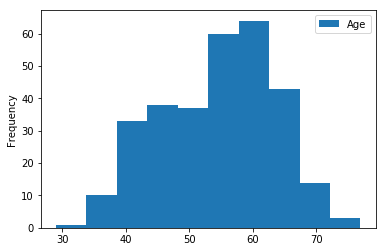

In [10]:
heart.plot.hist(y='Age')

#### 9) 성별에 대한 pie plot (백분율로 표시)
  - 여성과 남성의 명 수를 확인후 pie 그래프로 표현
  - 성비 분포로 봤을때 여성보다 남성이 36%정도 더 많은걸 볼 수 있다.

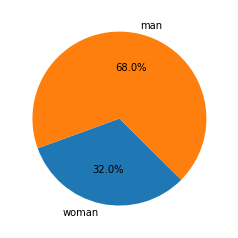

In [11]:
woman = heart.loc[heart['Sex']==0 , :]
man = heart.loc[heart['Sex']==1 , :]

woman = woman['Age'].count()
man   = man['Age'].count()

label=['woman','man']
lis = [woman,man]

plt.pie(lis,labels=label,startangle=200,autopct='%1.1f%%')
plt.show()


#### 10)ChestPain 에 대한 카운트 bar chart


ChestPain  : 흉통 유형(1 = 전형적인 협심증, 2 = 비정형 협심증, 3 = 비협심증, 4 : 무증상 

               (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
#### 확인
- 흉통의 유형에 따라 사람수 bar로 표현
- 무증상을 느끼는 사람은 140명, 비협심증 80명, 비정형 협십증 약 50명 , 전형적인 협심증 20명 이 분포 하고 있다는 것을 볼 수 있다.
- 대략적으로 심장병을 앓고 있을 수 있는 사람은 20 ~ 110사이 의 사람의 수가 예측이 된다.

[23, 50, 86, 144]


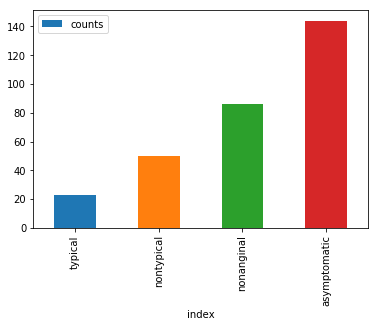

In [191]:
typical = heart.loc[heart['ChestPain']=='typical',:]
nontypical = heart.loc[heart['ChestPain']=='nontypical',:]
nonanginal = heart.loc[heart['ChestPain']=='nonanginal',:]
asymptomatic = heart.loc[heart['ChestPain']=='asymptomatic',:]


typical      = typical['ChestPain'].count()
nontypical   = nontypical['ChestPain'].count()
nonanginal   = nonanginal['ChestPain'].count()
asymptomatic = asymptomatic['ChestPain'].count()



index  = ['typical','nontypical','nonanginal','asymptomatic']
counts = [typical,nontypical,nonanginal,asymptomatic]

print(counts)

s=pd.DataFrame({"index":index,"counts":counts})


s.plot.bar(x='index',y='counts')

#### 11)나이와  최대심박수, 나이와 혈압과의 관계 확인 (상관계수, scatter plot)

- 상관계수 : 1과 가까울수록 양의 상관관계, -1과 가까울수록 음의 상관 관계를 의미한다.
- 상관관계과 인과관계를 의미하는 것은 아니다.

#### 확인
- MaxHR   그래프를 보면 나이가 올라갈수록 최대심박 분포가 크차이는 아니지만   내려가고 있다는 것을 볼 수 있다.
- RestBP  그래프를 보면 나이가 올라갈수록 협압의 수치가 높은곳에 분포 되어있는것을 확일 할 수 있다.



 #### 두개의 그래프를 보면 나이가 많을 수록 최대심박수는 떨어지고 혈압은 높아지는 것을 확인 할 수 있다. 하지만 같은 연령대에도 다른 점을 보이는 것으로      보아, 일반화 하기에는 아직 어려워 보인다.


==================상관 계수===============


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.223120
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.276816
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.150825
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.085164
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.025264
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.169202
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.417167
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.431894
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.424510
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110119,0.339213


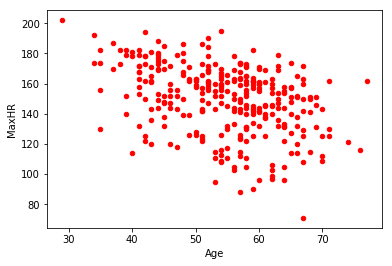

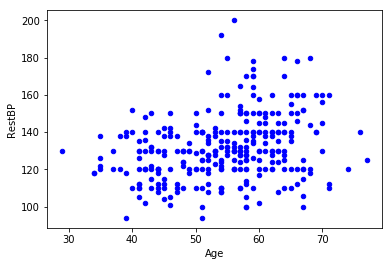

In [14]:
heart.plot.scatter(x='Age',y='MaxHR',color ='red' )
heart.plot.scatter(x='Age',y='RestBP',color ='blue')

print("==================상관 계수===============")
heart.corr()

#### 속성중 4개만 선택하여 심장병과의 관계 분석 scatter_matrix()(임의로 선택해)

 - 나이 , 성별, 최대심박수,우울증 속성을 30개 만 뽑아서 추출 하여서  심장병과 상관관계가 있는지를 알아 볼려고 한다.
   
   
  #### 확인 
 - 속성값들이 10,20,30.. 50..100.. n개 늘려서 테스를 하여 상관 관계를 살펴 보자.
 - Sex 와 Age , Sex와 MaxHR , Sex와 OldPeak 의 관계는 속성의 값이 많아 지면 질수록 분류 하기가 더 어려워 진다.
 - Age와 MaxHR의   그래프의 분포를 보면 4개의 속성이 상당히 잘 구별이 되며, 군집이 잘 형성 된것을 볼수 있다.
 - MaxHR와 OldPeak의 그래프의 분포를 보면 또한 4개의 속성이  상당히 잘 구별이 되어지고 있는 것을 볼 수있다.
 
 
 #### Age와 MaXHR, MaxHR와 OldPeak는 상관관계를 보이는 것으로 예측이 되며 Sex와 Age , Sex와 MaxHR 등은 상관관계 성립하기 어려워 보이는 것을 보인다. 
 
  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa287b3a1d0>,
      dtype=object)

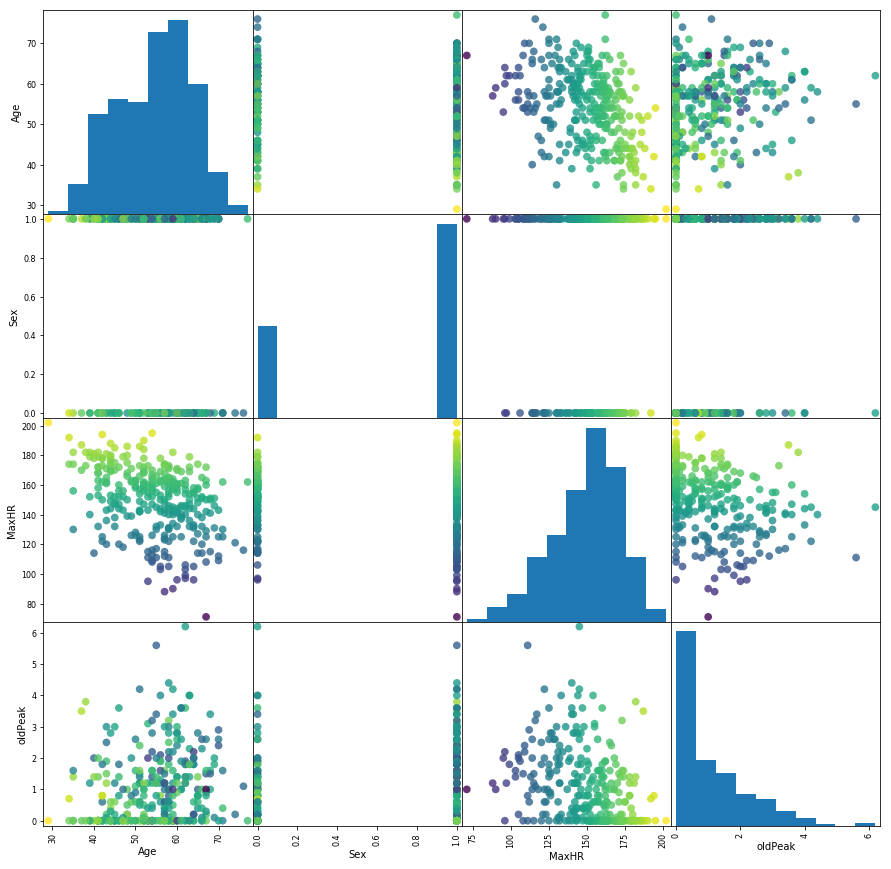

In [180]:
Age  = heart['Age']
Sex  = heart['Sex']
MaxHR  =heart['MaxHR']
oldpeal  =heart["Oldpeak"]


dataset = pd.DataFrame({
    "Age":Age[:],
    "Sex":Sex[:],
    "MaxHR":MaxHR[:],
    "oldPeak":oldpeal[:],

})

pd.plotting.scatter_matrix(dataset, s=60,diagonal='hist',c = dataset['MaxHR'],marker='o',figsize=(15, 15),alpha=.8,cmap='viridis')

#### 12)4개 특징의 분포 확인 (boxplot)

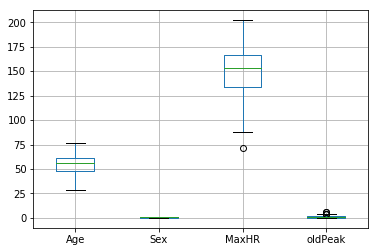

In [181]:
dataset.boxplot()

#### 13)target(AHD)을 기준(groupby)으로 최대, 최소, 평균, 표준편차 계산 

In [182]:
AHD = heart.groupby('AHD')
print("================================================평균========================================================================")
print(AHD.mean())
print("==================================================최소======================================================================")
print(AHD.min())
print("====================================================최대=====================================================================")
print(AHD.max())
print("====================================================표준편차=====================================================================")
print(AHD.std())



================================================평균========================================================================
           Age       Sex      RestBP        Chol       Fbs   RestECG  \
AHD                                                                    
0    52.585366  0.560976  129.250000  242.640244  0.140244  0.835366   
1    56.625899  0.820144  134.568345  251.474820  0.158273  1.172662   

          MaxHR     ExAng   Oldpeak     Slope        Ca  
AHD                                                      
0    158.378049  0.140244  0.586585  1.408537  0.273292  
1    139.258993  0.546763  1.574101  1.827338  1.137681  
==================================================최소======================================================================
     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
AHD                                                                     
0     29    0  asymptomatic      94   126    0        0     96      0   
1     35    0 

#### 14)4개 특징과 target(AHD)를 이용하여 학습데이터, 테스트데이터 집합 준비 (테스트 데이터는 전체에 20%)
 - 훈련데이터와 학습 데이터가 확실하게 원하는 대로 분활 하지 못하였다.
 - 각각의 훈련데이터와 테스트 데이터를 강제적으로 맞췄다.
 - 정확한 모뎅링과 정확도가 나오기는 힘들것으로 예상한다.
 - 

In [251]:
print(heart.keys())


X_train,X_test,y_train,y_test = train_test_split(dataset['Age'],heart['AHD'],train_size =10 ,test_size=0.20,random_state=0)




X_train=np.array((X_train))
X_test=np.array(X_test[:10])
y_train=np.array(y_train)
y_test=np.array(y_test[:10])
 
X_train  =  X_train.reshape(-1,10)
y_train  =  y_train.reshape(-1,10)
X_test   =  X_test.reshape(-1,10)
y_test   =  y_test.reshape(-1,10)


print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

print(X_test)
print(y_test)

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')
X_train 크기: (1, 10)
y_train 크기: (1, 10)
X_test 크기: (1, 10)
y_test 크기: (1, 10)
[[34 67 54 64 44 67 57 35 53 46]]
[[0 0 1 0 1 1 1 1 1 0]]


#### 평가 
  - 위의 학습데이터와 훈련데이터가 올바르게 구성이 되어 있지 못하여  테스트 세트의 정학도가 없는 것을 확인을 할 수있다.
  - 또한 그래프를 통해서 정확도가 현저히 없는것을 확인 할수 있는것으로 보아 학습 데이터와 훈련데이터를 올바르게 구성 할 수 있도록 데이터를 다시 재구   성 해야 한다.
  - 올바은 학습데이터와 훈련데이터를 얻기 위해서 다시 시도를 해봐야겠습니다.
  - 훈련데이터와 학습데이터의 중요성을 얻었습니다.

[[1 1 1 1 0 1 1 1 1 0]]
테스트 세트의 정확도 : 0.00
테스트 세트의 정확도 : 0.60


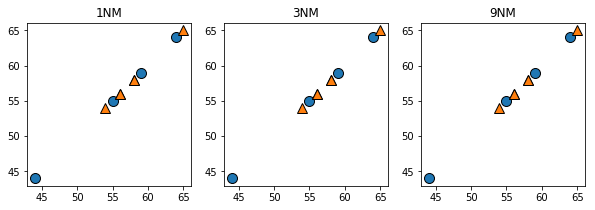

In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pp = knn.predict(X_test)

print(pp)
print("테스트 세트의 정확도 : {:.2f}".format(knn.score(X_train,y_test)))
print("테스트 세트의 정확도 : {:.2f}".format(np.mean(pp == y_test)))


fig ,axes =plt.subplots(1,3,figsize=(10,3))

for n_n,ax in zip([1,3,9],axes):
    knn = KNeighborsClassifier(n_neighbors=n_n).fit(X_train,y_test)
    #mglearn.plots.plot_2d_separator(knn,X_train,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X_train[:],X_train[:],y_test,ax=ax)
    ax.set_title("{}NM".format(n_n))
